In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-dataset/train.csv
/kaggle/input/glove-6b-100d/glove.6B.100d.txt


# Import Necessary Libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
from nltk.stem import PorterStemmer
warnings.filterwarnings('ignore')

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Set the NLTK data path manually
nltk.data.path.append('/usr/share/nltk_data')

# Try downloading WordNet again
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# List files in the NLTK data directory
# print(nltk.data.find('corpora/wordnet'))

# Load Data and Data Anaysis

In [8]:
df = pd.read_csv("/kaggle/input/twitter-sentiment-dataset/train.csv")

In [9]:
df.columns

Index(['Sentiment', 'text'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036908 entries, 0 to 1036907
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1036908 non-null  int64 
 1   text       1036908 non-null  object
dtypes: int64(1), object(1)
memory usage: 15.8+ MB


In [11]:
df.isna().sum()
# No null vaules

Sentiment    0
text         0
dtype: int64

In [12]:
df.Sentiment.value_counts()
# Data have Sentiment values 0 (Negative) and 4 (Positive)

Sentiment
0    790181
4    246727
Name: count, dtype: int64

In [13]:
# replace he 4 with 1 for Postive Sentiment
df['Sentiment'] = df['Sentiment'].replace({4:1})

* 0 represent Negative sentiment
* 1 represents Positive sentiment

# EDA

### Sentiment Column

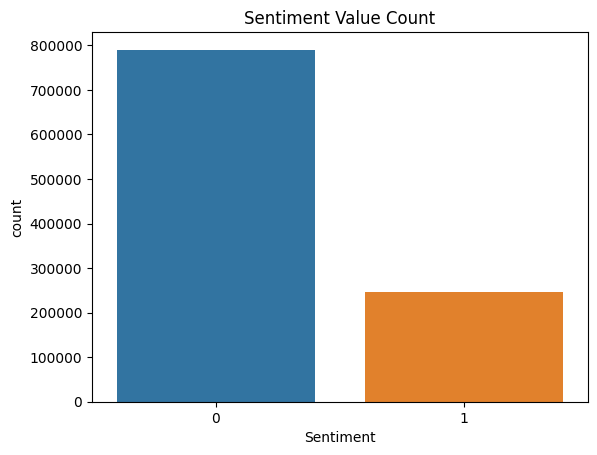

In [14]:
sns.countplot(x=df['Sentiment'])
plt.title("Sentiment Value Count")
plt.show()

> With above visualiation you can see data is imblanced so, we can perform undersampling and oversampling on the data. I will perform data under sampling due to resource constrain but you can try upsampling also.

# Down Sampling

In [15]:
from sklearn.utils import resample
## majority class 0
df_majority = df[df['Sentiment']==0]
## minority class 1
df_minority = df[df['Sentiment']==1][:20000]
df_minority.shape
# downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,   
                                 n_samples=len(df_minority),    
                                 random_state=1234) 
df = pd.concat([df_majority_downsampled, df_minority])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 254910 to 810180
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  40000 non-null  int64 
 1   text       40000 non-null  object
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


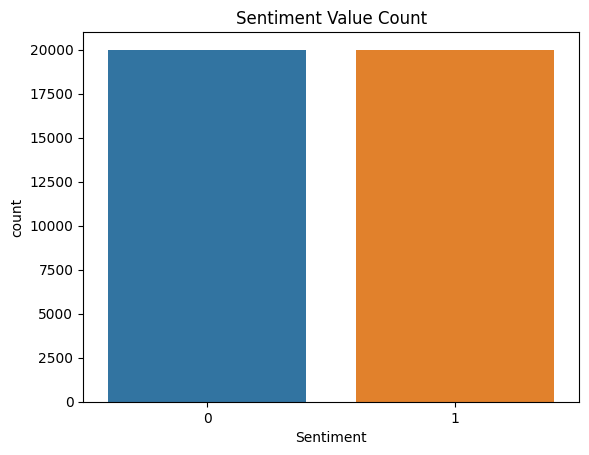

In [16]:
sns.countplot(x=df['Sentiment'])
plt.title("Sentiment Value Count")
plt.show()

### Text Column

> To perform EDA on text field we should perform text preprocessing for better visulization

# Text Preprocessing

1. Lowercasing → Ensures uniformity.
2. Website Removal → Deletes URLs starting with http, https, www.
3. Punctuation Removal → Removes special characters (.,!?).
4. Tokenization → Splits text into words.
5. Stopword Removal → Removes common words like "is", "the", "at".
6. Alphanumeric Code Removal → Removes words with both numbers & letters (e.g., sde32wsd).
7. Number Removal → Removes words that contain only numbers (12345).
8. Stemming → Converts words to base form (running → run, swimming → swim).

In [17]:
## remove stopwords and punctuation marks
word_to_be_removed = list(stopwords.words('english'))+list(punctuation)
# Initilize stemmer
porter = PorterStemmer()

# Function to clean text
def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    # 2. Remove website URLs (http, https, www)
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)    
    # 3. Remove alphanumeric codes (words with both letters & numbers, like 'w223')
    words = re.sub(r'\b[a-zA-Z0-9]*\d+[a-zA-Z0-9]*\b', '', text)
    # 4. Remove numbers-only words using regex
    words = re.sub(r'\b(?<![0-9-])(\d+)(?![0-9-])\b', '', text)    
    # 5. Tokenization
    words = word_tokenize(text)
    # 6. Lemmatization, Remove stop words and punctuation
    words = [porter.stem(word) for word in words if not word in word_to_be_removed]
    
    return ' '.join(words)

# Apply cleaning function to text column
df['cleaned_text'] = df['text'].apply(clean_text)


In [18]:
df.sample(5)

,Sentiment,text,cleaned_text
512841,0,omg i dont wanna go to workplacement,omg dont wan na go workplac
803880,1,THANK GOD FOR EXPERIMENTING!!,thank god experi
471825,0,"@oPONOo good thanks, just getting ready for a ...",oponoo good thank get readi meet unfortun make...
795401,1,trying to setup yahoo pipes for tracking some ...,tri setup yahoo pipe track import blog ... ..l...
806262,1,Getting some work done and going to the grille...,get work done go grill bit eat lunch get littl...


In [19]:
# Storing positive data seperately
positive = df[df['Sentiment'] == 1]
positive_list = positive['cleaned_text'].tolist()

# Storing negative data seperately

negative = df[df['Sentiment'] == 0]
negative_list = negative['cleaned_text'].tolist()

In [20]:
positive_all = " ".join([word for word in positive_list])
negative_all = " ".join([word for word in negative_list])

## Positive Words - Word Cloud

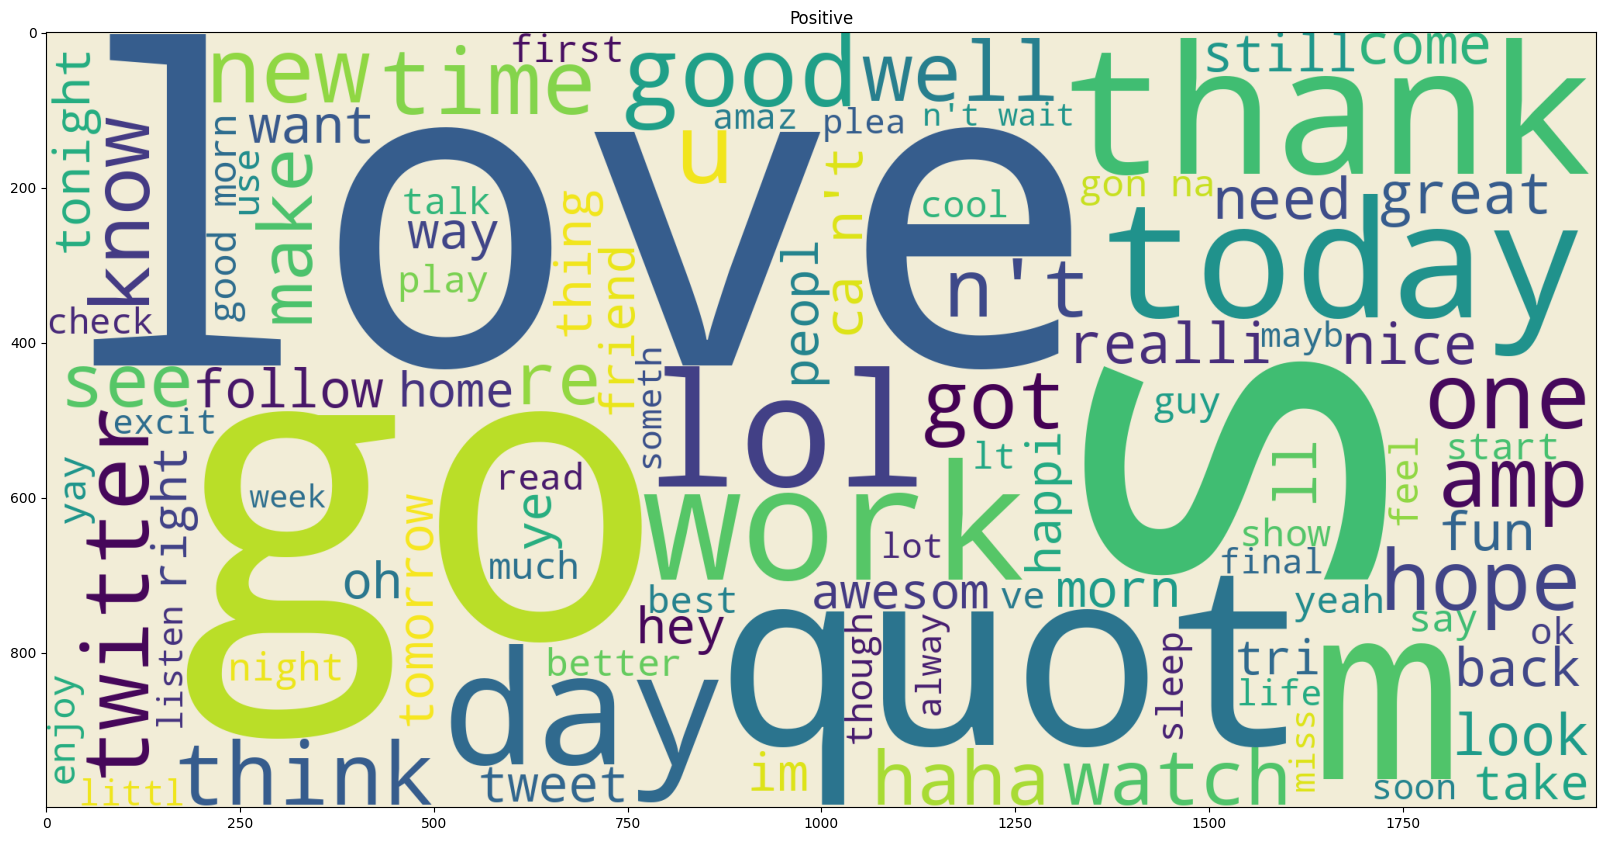

In [21]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

## Negative Words - Word Cloud

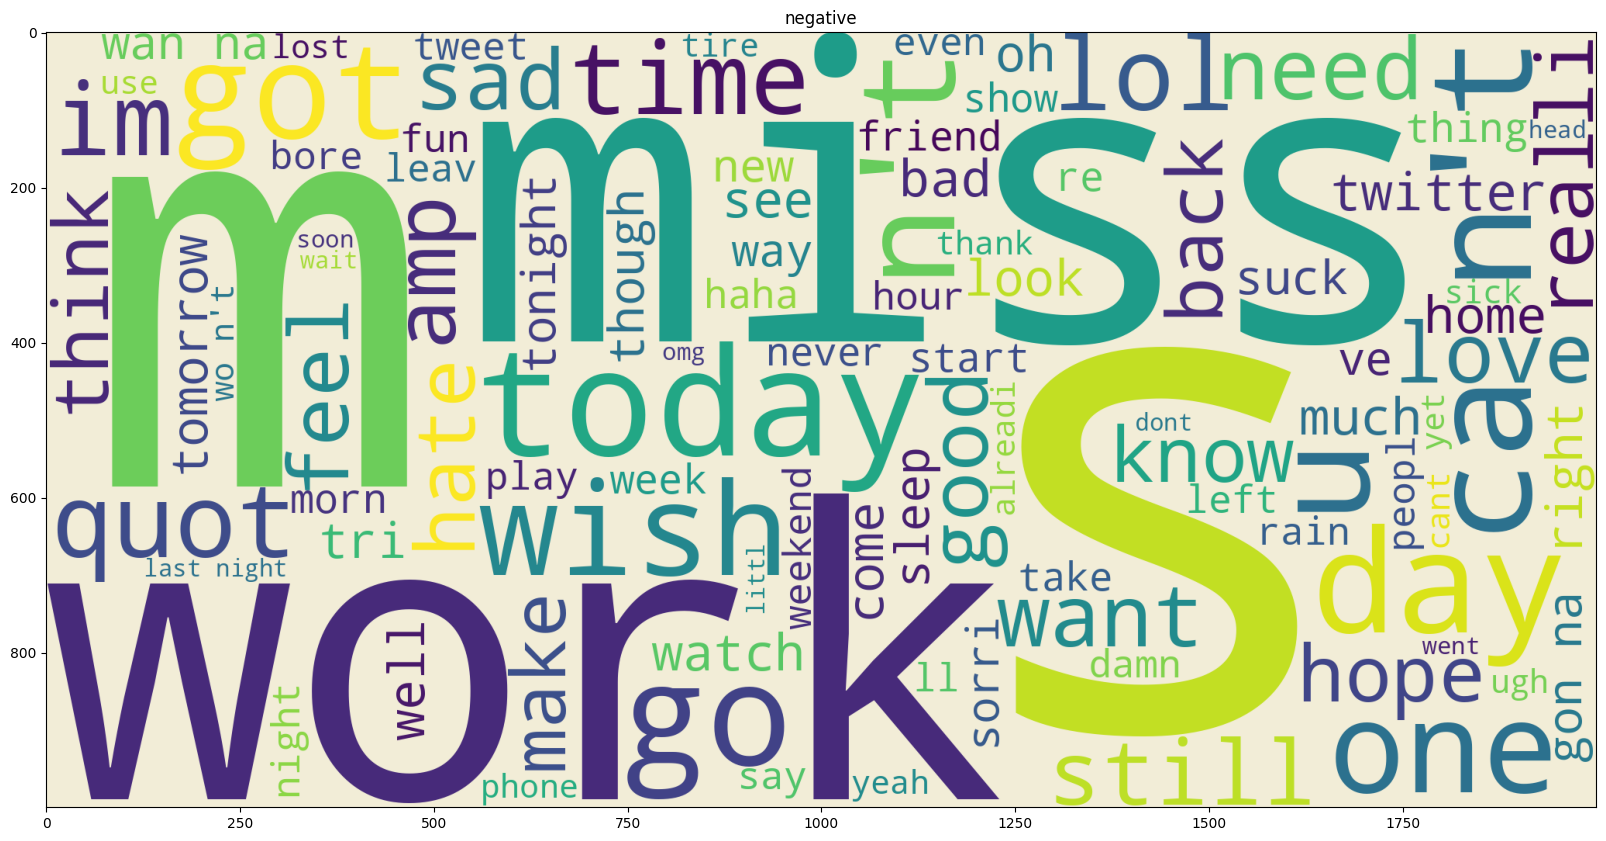

In [22]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

# Test Train Split

In [23]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df['cleaned_text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using TF-IDF Text Representation Technique

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train).toarray()
tf_x_test = vectorizer.transform(X_test).toarray()

## Naive Bayes Model

In [24]:
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

model1 = GaussianNB()
model2 = MultinomialNB()
model3 = BernoulliNB()

# Create a list of labels for the classifiers
labels = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']

# Loop through the classifiers and perform 5-fold cross-validation for each
for model, label in zip([model1, model2, model3], labels):
    # fit the model with the training data
    model.fit(tf_x_train, y_train)
    
    # predict the target on the train dataset
    predict_train = model.predict(tf_x_train)

    # Accuray Score on train dataset
    print("-"*20+label+"-"*20)
    accuracy_train = accuracy_score(y_train,predict_train)
    print('label accuracy_score on train dataset : ', accuracy_train)

    # predict the target on the test dataset
    predict_test = model.predict(tf_x_test)
    # print('Target on test data',predict_test) 

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(y_test,predict_test)
    print('label accuracy_score on test dataset : ', accuracy_test)

--------------------GaussianNB--------------------
label accuracy_score on train dataset :  0.86740625
label accuracy_score on test dataset :  0.562625
--------------------MultinomialNB--------------------
label accuracy_score on train dataset :  0.88815625
label accuracy_score on test dataset :  0.743375
--------------------BernoulliNB--------------------
label accuracy_score on train dataset :  0.88640625
label accuracy_score on test dataset :  0.7535


## Final Report for Naive Bayes

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Gaussian Naive Bayes|86%|56%|
|Multinomial Naive Bayes| 88%|74%|
|Bernoulli Naive Bayes|88%|75%|


## Logistic regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# fit the model with the training data
lr.fit(tf_x_train, y_train)

# predict the target on the train dataset
predict_train = lr.predict(tf_x_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('RandomForestClassifier accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = lr.predict(tf_x_test)
# print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('RandomForestClassifier accuracy_score on test dataset : ', accuracy_test)

RandomForestClassifier accuracy_score on train dataset :  0.8471875
RandomForestClassifier accuracy_score on test dataset :  0.759375


## Final Report for Logistic Regression Model

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Logistic Regression|85%|76%|

## Linear SVC Model

In [29]:
from sklearn.svm import LinearSVC

svc = LinearSVC()

# fit the model with the training data
svc.fit(tf_x_train, y_train)

# predict the target on the train dataset
predict_train = svc.predict(tf_x_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('GradientBoostingClassifier accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = svc.predict(tf_x_test)
# print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('GradientBoostingClassifier accuracy_score on test dataset : ', accuracy_test)

GradientBoostingClassifier accuracy_score on train dataset :  0.9471875
GradientBoostingClassifier accuracy_score on test dataset :  0.74625


## Final Report for Linear SVC Model

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Linear SVC|95%|75%|

## xgboost Model

> Run XGBoost on a GPU for faster results—unless you enjoy watching paint dry, in which case, stick with a CPU! 😆🔥

In [28]:
import torch
import xgboost as xgb

# XGB Classifier
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
xg_cl = xgb.XGBClassifier(objective='binary:logitraw', n_estimators=500, seed=123, device=device)
eval_set = [(tf_x_train, y_train), (tf_x_test, y_test)]

# Fit the classifier to the training set
xg_cl.fit(tf_x_train, y_train, eval_set=eval_set, verbose=False)

# predict the target on the train dataset
predict_train = xg_cl.predict(tf_x_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('xgboost accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = xg_cl.predict(tf_x_test)
# print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('xgboost accuracy_score on test dataset : ', accuracy_test)

xgboost accuracy_score on train dataset :  0.8506875
xgboost accuracy_score on test dataset :  0.72875


## Final Report for xgboost Model

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|xgboost|85%|73%|

## Final Report of all ML Models for TFIDF Text Representation 

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Gaussian Naive Bayes|86%|56%|
|Multinomial Naive Bayes| 88%|74%|
|Bernoulli Naive Bayes|88%|75%|
|Logistic Regression|85%|76%|
|Linear SVC|95%|75%|
|xgboost|85%|73%|
|Logistic Regression|85%|76%|

# Using Word2Vec Text Representation Technique

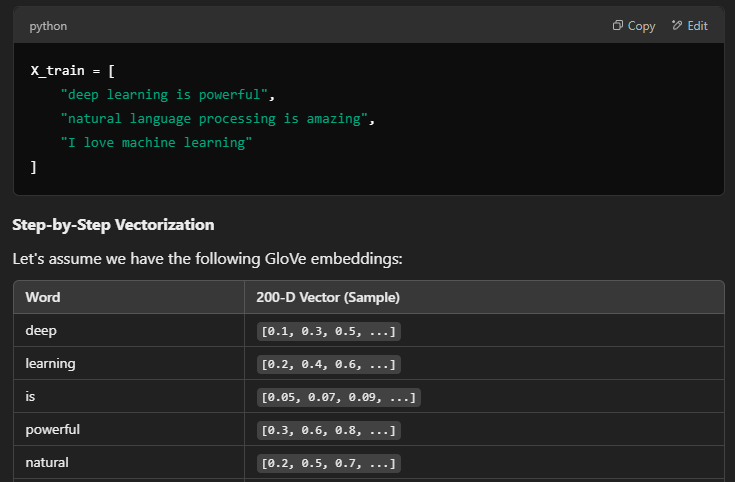
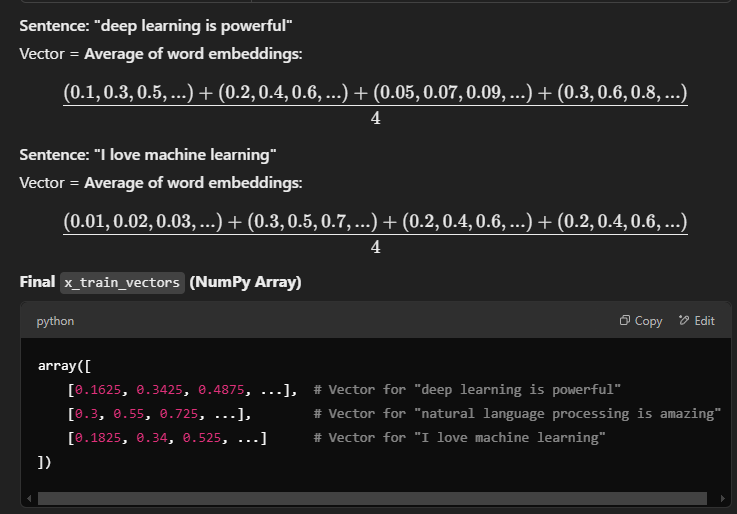

In [24]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("incorpes/glove6b200d")

# print("Path to dataset files:", path)

In [26]:
# Load GloVe embeddings
def load_glove_embeddings(glove_path):
    embeddings_index = {}
    with open(glove_path, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

# Convert sentences to vectors by averaging word embeddings
def sentence_to_vector(sentence, embeddings_index, embedding_dim=100):
    words = sentence.split()
    valid_embeddings = [embeddings_index[word] for word in words if word in embeddings_index]
    if valid_embeddings:
        return np.mean(valid_embeddings, axis=0)
    else:
        return np.zeros(embedding_dim)

# Load embeddings
glove_path = "/kaggle/input/glove-6b-100d/glove.6B.100d.txt"  # Update with the actual path to the file
embeddings_index = load_glove_embeddings(glove_path)

# Convert text data to vectors
tf_x_train = np.array([sentence_to_vector(text, embeddings_index) for text in X_train])
tf_x_test = np.array([sentence_to_vector(text, embeddings_index) for text in X_test])


## Naive Bayes Model

In [27]:
from sklearn.metrics import accuracy_score

In [29]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

model1 = GaussianNB()
model3 = BernoulliNB()

# Create a list of labels for the classifiers
labels = ['GaussianNB', 'BernoulliNB']

# Loop through the classifiers and perform 5-fold cross-validation for each
for model, label in zip([model1, model3], labels):
    # fit the model with the training data
    model.fit(tf_x_train, y_train)
    
    # predict the target on the train dataset
    predict_train = model.predict(tf_x_train)

    # Accuray Score on train dataset
    print("-"*20+label+"-"*20)
    accuracy_train = accuracy_score(y_train,predict_train)
    print('label accuracy_score on train dataset : ', accuracy_train)

    # predict the target on the test dataset
    predict_test = model.predict(tf_x_test)
    # print('Target on test data',predict_test) 

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(y_test,predict_test)
    print('label accuracy_score on test dataset : ', accuracy_test)

--------------------GaussianNB--------------------
label accuracy_score on train dataset :  0.59259375
label accuracy_score on test dataset :  0.59225
--------------------BernoulliNB--------------------
label accuracy_score on train dataset :  0.611625
label accuracy_score on test dataset :  0.605125


## Final Report for Naive Bayes

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Gaussian Naive Bayes|59%|59%|
|Bernoulli Naive Bayes| 61%|60%|


## Logistic regression Model

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# fit the model with the training data
lr.fit(tf_x_train, y_train)

# predict the target on the train dataset
predict_train = lr.predict(tf_x_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('RandomForestClassifier accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = lr.predict(tf_x_test)
# print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('RandomForestClassifier accuracy_score on test dataset : ', accuracy_test)

RandomForestClassifier accuracy_score on train dataset :  0.68484375
RandomForestClassifier accuracy_score on test dataset :  0.6755


## Final Report for Logistic Regression Model

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Logistic Regression|68%|67%|

## Linear SVC Model

In [31]:
from sklearn.svm import LinearSVC

svc = LinearSVC()

# fit the model with the training data
svc.fit(tf_x_train, y_train)

# predict the target on the train dataset
predict_train = svc.predict(tf_x_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('GradientBoostingClassifier accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = svc.predict(tf_x_test)
# print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('GradientBoostingClassifier accuracy_score on test dataset : ', accuracy_test)

GradientBoostingClassifier accuracy_score on train dataset :  0.68553125
GradientBoostingClassifier accuracy_score on test dataset :  0.6765


## Final Report for Linear SVC Model

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Linear SVC|68%|67%|

## xgboost Model

> Run XGBoost on a GPU for faster results—unless you enjoy watching paint dry, in which case, stick with a CPU! 😆🔥

In [38]:
import torch
import xgboost as xgb

# XGB Classifier
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth = 3, n_estimators=500, seed=123, device=device)
eval_set = [(tf_x_train, y_train), (tf_x_test, y_test)]

# Fit the classifier to the training set
xg_cl.fit(tf_x_train, y_train, eval_set=eval_set, verbose=False)

# predict the target on the train dataset
predict_train = xg_cl.predict(tf_x_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('xgboost accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = xg_cl.predict(tf_x_test)
# print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('xgboost accuracy_score on test dataset : ', accuracy_test)

xgboost accuracy_score on train dataset :  0.83703125
xgboost accuracy_score on test dataset :  0.678625


## Final Report for xgboost Model

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|xgboost|83%|67%|

## Final Report of all ML Models for TFIDF Text Representation 

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Gaussian Naive Bayes|59%|59%|
|Bernoulli Naive Bayes| 61%|60%|
|Logistic Regression|68%|67%|
|Linear SVC|68%|67%|
|xgboost|83%|67%|

# Using Bert Embeddings Text Representation Technique

In [25]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load pre-trained BERT model for sentence embeddings
embedding_model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')  # or 'sentence-transformers/all-MiniLM-L6-v2' for a lighter model


In [28]:
# Convert to list and ensure string type
X_train = X_train.astype(str).tolist()
X_test = X_test.astype(str).tolist()

# Generate BERT embeddings
tf_x_train = np.array(embedding_model.encode(X_train, convert_to_numpy=True))
tf_x_test = np.array(embedding_model.encode(X_test, convert_to_numpy=True))

Batches:   0%|          | 0/1000 [00:00<?, ?it/s]

Batches:   0%|          | 0/250 [00:00<?, ?it/s]

## Naive Bayes Model

In [30]:
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

model1 = GaussianNB()
# model2 = MultinomialNB()
model3 = BernoulliNB()

# Create a list of labels for the classifiers
labels = ['GaussianNB', 'BernoulliNB']

# Loop through the classifiers and perform 5-fold cross-validation for each
for model, label in zip([model1, model3], labels):
    # fit the model with the training data
    model.fit(tf_x_train, y_train)
    
    # predict the target on the train dataset
    predict_train = model.predict(tf_x_train)

    # Accuray Score on train dataset
    print("-"*20+label+"-"*20)
    accuracy_train = accuracy_score(y_train,predict_train)
    print('label accuracy_score on train dataset : ', accuracy_train)

    # predict the target on the test dataset
    predict_test = model.predict(tf_x_test)
    # print('Target on test data',predict_test) 

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(y_test,predict_test)
    print('label accuracy_score on test dataset : ', accuracy_test)

--------------------GaussianNB--------------------
label accuracy_score on train dataset :  0.68646875
label accuracy_score on test dataset :  0.691125
--------------------BernoulliNB--------------------
label accuracy_score on train dataset :  0.6855625
label accuracy_score on test dataset :  0.68775


## Final Report for Naive Bayes

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Gaussian Naive Bayes|68%|69%|
|Bernoulli Naive Bayes|68%|68%|


## Logistic regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# fit the model with the training data
lr.fit(tf_x_train, y_train)

# predict the target on the train dataset
predict_train = lr.predict(tf_x_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('RandomForestClassifier accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = lr.predict(tf_x_test)
# print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('RandomForestClassifier accuracy_score on test dataset : ', accuracy_test)

RandomForestClassifier accuracy_score on train dataset :  0.74321875
RandomForestClassifier accuracy_score on test dataset :  0.734125


## Final Report for Logistic Regression Model

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Logistic Regression|74%|73%|

## Linear SVC Model

In [35]:
from sklearn.svm import LinearSVC

svc = LinearSVC()

# fit the model with the training data
svc.fit(tf_x_train, y_train)

# predict the target on the train dataset
predict_train = svc.predict(tf_x_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('GradientBoostingClassifier accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = svc.predict(tf_x_test)
# print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('GradientBoostingClassifier accuracy_score on test dataset : ', accuracy_test)

GradientBoostingClassifier accuracy_score on train dataset :  0.7266875
GradientBoostingClassifier accuracy_score on test dataset :  0.718375


## Final Report for Linear SVC Model

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Linear SVC|72%|71%|

## xgboost Model

> Run XGBoost on a GPU for faster results—unless you enjoy watching paint dry, in which case, stick with a CPU! 😆🔥

In [36]:
import torch
import xgboost as xgb

# XGB Classifier
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
xg_cl = xgb.XGBClassifier(objective='binary:logitraw', n_estimators=500, seed=123, device=device)
eval_set = [(tf_x_train, y_train), (tf_x_test, y_test)]

# Fit the classifier to the training set
xg_cl.fit(tf_x_train, y_train, eval_set=eval_set, verbose=False)

# predict the target on the train dataset
predict_train = xg_cl.predict(tf_x_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('xgboost accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = xg_cl.predict(tf_x_test)
# print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('xgboost accuracy_score on test dataset : ', accuracy_test)

xgboost accuracy_score on train dataset :  0.99946875
xgboost accuracy_score on test dataset :  0.710875


## Final Report for xgboost Model

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|xgboost|99%|71%|

## Final Report of all ML Models for TFIDF Text Representation 

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|Gaussian Naive Bayes|68%|69%|
|Bernoulli Naive Bayes|68%|68%|
|Logistic Regression|74%|73%|
|Linear SVC|72%|71%|
|xgboost|99%|71%|